In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Loading the Data

In [2]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
df_meta = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/meta.csv')
df_meta.head()

In [3]:
# load dicom info file
df_dicom = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/dicom_info.csv')
#df_dicom.head()

In [ ]:
# check image types in dataset
df_dicom.SeriesDescription.unique()

In [4]:
# check image path in dataset
# cropped images
cropped_images = df_dicom[df_dicom.SeriesDescription=='cropped images'].image_path
#cropped_images.head(5)

In [5]:
#full mammogram images
full_mammo = df_dicom[df_dicom.SeriesDescription=='full mammogram images'].image_path
#full_mammo.head(5)

In [6]:
# ROI images
roi_img = df_dicom[df_dicom.SeriesDescription=='ROI mask images'].image_path
#roi_img.head(5)

In [7]:
# set correct image path for image types
imdir = '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg'

In [8]:
# change directory path of images
cropped_images = cropped_images.replace('CBIS-DDSM/jpeg', imdir, regex=True)
full_mammo = full_mammo.replace('CBIS-DDSM/jpeg', imdir, regex=True)
roi_img = roi_img.replace('CBIS-DDSM/jpeg', imdir, regex=True)

# view new paths
print('Cropped Images paths:\n')
print(cropped_images.iloc[0])
print('Full mammo Images paths:\n')
print(full_mammo.iloc[0])
print('ROI Mask Images paths:\n')
print(roi_img.iloc[0])

Cropped Images paths:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.129308726812851964007517874181459556304/1-172.jpg
Full mammo Images paths:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg
ROI Mask Images paths:

../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.153339052913121382622526066491844156138/2-270.jpg


In [9]:
# organize image paths
full_mammo_dict = dict()
cropped_images_dict = dict()
roi_img_dict = dict()

for dicom in full_mammo:
    key = dicom.split("/")[4]
    full_mammo_dict[key] = dicom
for dicom in cropped_images:
    key = dicom.split("/")[4]
    cropped_images_dict[key] = dicom
for dicom in roi_img:
    key = dicom.split("/")[4]
    roi_img[key] = dicom

# view keys
next(iter((full_mammo_dict.items())))

('1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849',
 '../input/cbis-ddsm-breast-cancer-image-dataset/jpeg/1.3.6.1.4.1.9590.100.1.2.248386742010678582309005372213277814849/1-249.jpg')

# Mass Dataset

In [10]:
# load the mass dataset
mass_train = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_train_set.csv')
mass_test = pd.read_csv('/kaggle/input/cbis-ddsm-breast-cancer-image-dataset/csv/mass_case_description_test_set.csv')

#mass_train.head()

In [11]:
# fix image paths
def fix_image_path(data):
    """correct dicom paths to correct image paths"""
    for index, img in enumerate(data.values):
        img_name = img[11].split("/")[2]
        data.iloc[index,11] = full_mammo_dict[img_name]
        img_name = img[12].split("/")[2]
        data.iloc[index,12] = cropped_images_dict[img_name]
        
# apply to datasets
fix_image_path(mass_train)
fix_image_path(mass_test)

In [ ]:
# check unique values in pathology column
mass_train.pathology.unique()

In [ ]:
mass_train.info()

In [12]:
# rename columns
mass_train = mass_train.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

#mass_train.head(5)

In [ ]:
# check for null values
mass_train.isnull().sum()

In [13]:
# fill in missing values using the backwards fill method
mass_train['mass_shape'] = mass_train['mass_shape'].fillna(method='bfill')
mass_train['mass_margins'] = mass_train['mass_margins'].fillna(method='bfill')

#check null values
#mass_train.isnull().sum()

In [ ]:
# quantitative summary of features
mass_train.describe()

In [ ]:
# view mass_test
mass_test.head()

In [ ]:
# check datasets shape
print(f'Shape of mass_train: {mass_train.shape}')
print(f'Shape of mass_test: {mass_test.shape}')

In [ ]:
mass_test.isnull().sum()

In [14]:
# check for column names in mass_test
#print(mass_test.columns)
#print('\n')
# rename columns
mass_test = mass_test.rename(columns={'left or right breast': 'left_or_right_breast',
                                           'image view': 'image_view',
                                           'abnormality id': 'abnormality_id',
                                           'abnormality type': 'abnormality_type',
                                           'mass shape': 'mass_shape',
                                           'mass margins': 'mass_margins',
                                           'image file path': 'image_file_path',
                                           'cropped image file path': 'cropped_image_file_path',
                                           'ROI mask file path': 'ROI_mask_file_path'})

# view renamed columns
#mass_test.columns

In [15]:
# fill in missing values using the backwards fill method
mass_test['mass_margins'] = mass_test['mass_margins'].fillna(method='bfill')

#check null values
#mass_test.isnull().sum()

# Visualizations

In [ ]:
# pathology distributions
value = mass_train['pathology'].value_counts()
plt.figure(figsize=(8,6))

plt.pie(value, labels=value.index, autopct='%1.1f%%')
plt.title('Breast Cancer Mass Types', fontsize=14)
#plt.savefig('/kaggle/working/pathology_distributions_red.png')
plt.show()

In [ ]:
# examine breast assessment types
plt.figure(figsize=(8,6))
sns.countplot(mass_train, y='assessment', hue='pathology', palette='viridis')
plt.title('Breast Cancer Assessment\n\n 0: Undetermined || 1: Well Differentiated\n2: Moderately differentiated || 3: Poorly DIfferentiated\n4-5: Undifferentiated', 
          fontsize=12)
plt.ylabel('Assessment Grade')
plt.xlabel('Count')
#plt.savefig('/kaggle/working/breast_assessment_red.png')
plt.show()

In [ ]:
# examine cancer subtlety
plt.figure(figsize=(8,6))
sns.countplot(mass_train, x='subtlety', palette='viridis')
plt.title('Breast Cancer Mass Subtlety', fontsize=12)
plt.xlabel('Subtlety Grade')
plt.ylabel('Count')
#plt.savefig('/kaggle/working/cancer_subtlety_red.png')
plt.show()

In [ ]:
# view breast mass shape distribution against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='mass_shape', hue='pathology')
plt.title('Mass Shape Distribution by Pathology', fontsize=14)
plt.xlabel('Mass Shape')
plt.xticks(rotation=30, ha='right')
plt.ylabel('Pathology Count')
plt.legend()
#plt.savefig('/kaggle/working/mass_pathology_red.png')
plt.show()

In [ ]:
# breast density against pathology
plt.figure(figsize=(8,6))

sns.countplot(mass_train, x='breast_density', hue='pathology')
plt.title('Breast Density vs Pathology\n\n1: fatty || 2: Scattered Fibroglandular Density\n3: Heterogenously Dense || 4: Extremely Dense',
          fontsize=14)
plt.xlabel('Density Grades')
plt.ylabel('Count')
plt.legend()
#plt.savefig('/kaggle/working/density_pathology_red.png')
plt.show()

In [ ]:
# Display some images
import matplotlib.image as mpimg

# create function to display images
def display_images(column, number):
    """displays images in dataset"""
    # create figure and axes
    number_to_visualize = number
    rows = 1
    cols = number_to_visualize
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5))
    
    # Loop through rows and display images
    for index, row in mass_train.head(number_to_visualize).iterrows():
        image_path = row[column]
        image = mpimg.imread(image_path)
        ax = axes[index]
        ax.imshow(image, cmap='gray')
        ax.set_title(f"{row['pathology']}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print('Full Mammograms:\n')
display_images('image_file_path', 5)
print('Cropped Mammograms:\n')
display_images('cropped_image_file_path', 5)

# Preprocessing of Images

In [16]:
import tensorflow as tf
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

def image_processor(image_path, target_size):
    """Preprocess images for CNN model"""
    absolute_image_path = os.path.abspath(image_path)
    image = cv2.imread(absolute_image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (target_size[1], target_size[0]))
    image_array = image / 255.0
    return image_array

# Merge datasets
full_mass = pd.concat([mass_train, mass_test], axis=0)

# Define the target size
target_size = (224, 224, 3)

# Apply preprocessor to train data
full_mass['processed_images'] = full_mass['image_file_path'].apply(lambda x: image_processor(x, target_size))

# Create a binary mapper
class_mapper = {'MALIGNANT': 1, 'BENIGN': 0, 'BENIGN_WITHOUT_CALLBACK': 0} 

# Convert the processed_images column to an array
X_resized = np.array(full_mass['processed_images'].tolist())

# Apply class mapper to pathology column
full_mass['labels'] = full_mass['pathology'].replace(class_mapper)

# Check the number of classes
num_classes = len(full_mass['labels'].unique())

# Split data into train, test, and validation sets (70, 20, 10)
X_train, X_temp, y_train, y_temp = train_test_split(X_resized, full_mass['labels'].values, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.33, random_state=42)

# Convert integer labels to one-hot encoded labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_val = to_categorical(y_val, num_classes)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

# CNN Architecture

In [ ]:
# Import necessary TensorFlow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

# Augment data
train_datagen = ImageDataGenerator(rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest'
                                  )

# apply augmentation to training data
train_data_augmented = train_datagen.flow(X_train, y_train, batch_size=16)

# instantiate CNN model
model = Sequential()

# add layers
model.add(Conv2D(32, (3, 3), activation='relu', 
                 input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten()) # flatten feature maps
model.add(Dense(512, activation='relu')) # add fully connected layers
model.add(Dense(num_classes, activation='softmax')) # output layer

# compile model
model.compile(loss='binary_crossentropy', 
              optimizer=Adam(lr=0.0001), 
              metrics=['accuracy'])

# train model
history = model.fit(train_data_augmented, 
                    epochs=20, 
                    validation_data=(X_val, y_val), 
                   )

In [ ]:
# model summary
model.summary()

# Evaluation

In [ ]:
model.evaluate(X_test, y_test)

# Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# create labels for confusion matrix
cm_labels = ['MALIGNANT', 'BENIGN']

# obtain predictions
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# convert predicted probabilities to class predictions
y_pred_classes_test = np.argmax(y_pred_test, axis=1)
y_pred_classes_train = np.argmax(y_pred_train, axis=1)

# Assuming y_test and y_val are in binary format (0 or 1)
y_true_classes_test = np.argmax(y_test, axis=1)
y_true_classes_train = np.argmax(y_train, axis=1)

# generate classification reports for test and val sets
test_report = classification_report(y_true_classes_test, y_pred_classes_test, target_names=cm_labels)
train_report = classification_report(y_true_classes_train, y_pred_classes_train, target_names=cm_labels)

# generate confusion matrices for test and validation sets
test_cm = confusion_matrix(y_true_classes_test, y_pred_classes_test)
train_cm = confusion_matrix(y_true_classes_train, y_pred_classes_train)

# create function to print confusion matrix
def plot_confusion_matrix(cm, labels, title):
    """plots a normalized confusion matrix as a heatmap."""
    # Calculate row sums
    row_sums = cm.sum(axis=1, keepdims=True)
    # Normalize confusion matrix
    normalized_cm = cm / row_sums

    plt.figure(figsize=(8, 6))
    sns.heatmap(normalized_cm, annot=True, fmt='.2%', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# print Train and Test reports and matrices
print(f"Train Set Classification report:\n {train_report}\n")
plot_confusion_matrix(train_cm, cm_labels, 'Train Set Confusion Matrix')

In [ ]:
print(f"Test Set Classification report:\n {test_report}\n")
plot_confusion_matrix(test_cm, cm_labels, 'Test Set Confusion Matrix')

# ROC_AUC Curves

In [ ]:
from sklearn.metrics import roc_curve, auc

# Use the trained model to predict probabilities for the test set
y_pred_prob = model.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f'AUC: {roc_auc:.2f}')

# Visualizing Loss vs Epoch/Accuracy vs Epoch 

In [ ]:
history_dict = history.history

In [ ]:
# plot training loss vs validation loss
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#history_df = pd.DataFrame(history.history)
#history_df[['loss', 'val_loss']].plot()

#history_df = pd.DataFrame(history.history)
#history_df[['accuracy', 'val_accuracy']].plot()

In [ ]:
# plot training vs validation accuracy
val_acc_values = history_dict['val_accuracy']
acc = history_dict['accuracy']

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Transfer Learning-Hyperparameter Tuning

80134624/80134624 [==============================] - 1s 0us/step
Epoch 1/10
75/75 [==============================] - 484s 6s/step - loss: 0.9709 - accuracy: 0.5299 - val_loss: 0.7084 - val_accuracy: 0.6548
Epoch 2/10
75/75 [==============================] - 481s 6s/step - loss: 0.7176 - accuracy: 0.5619 - val_loss: 0.6537 - val_accuracy: 0.6190
Epoch 3/10
75/75 [==============================] - 479s 6s/step - loss: 0.7394 - accuracy: 0.5459 - val_loss: 0.8223 - val_accuracy: 0.5179
Epoch 4/10
75/75 [==============================] - 479s 6s/step - loss: 0.7045 - accuracy: 0.5771 - val_loss: 0.6615 - val_accuracy: 0.6548
Epoch 5/10
75/75 [==============================] - 460s 6s/step - loss: 0.7097 - accuracy: 0.5661 - val_loss: 0.6554 - val_accuracy: 0.6726
Epoch 6/10
75/75 [==============================] - 462s 6s/step - loss: 0.7005 - accuracy: 0.5468 - val_loss: 0.7035 - val_accuracy: 0.5179
Epoch 7/10
75/75 [==============================] - 486s 6s/step - loss: 0.6774 - accurac

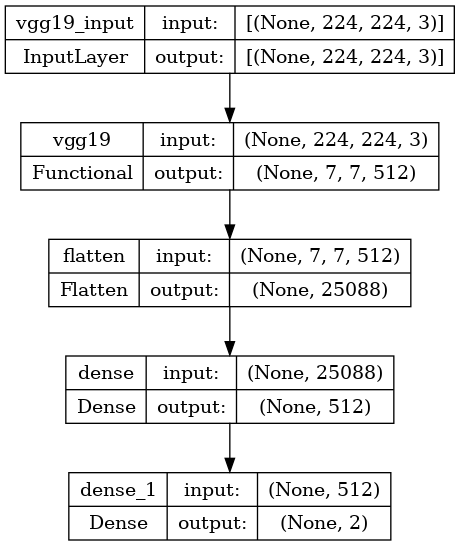

In [17]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model

# Augment data
train_datagen_aug = ImageDataGenerator(rotation_range=40, 
                                       width_shift_range=0.2, 
                                       height_shift_range=0.2, 
                                       shear_range=0.2, 
                                       zoom_range=0.2, 
                                       horizontal_flip=True, 
                                       fill_mode='nearest'
                                  )

# apply augmentation to training data
train_data_aug = train_datagen_aug.flow(X_train, y_train, batch_size=16)

# Fine-tune the pretrained model
pretrained_model = VGG19(include_top=False, 
                         input_shape=(224, 224, 3), 
                         weights='imagenet')

vgg_model = Sequential()

pretrained_model = VGG19(include_top=False, 
                         input_shape=(224, 224, 3), 
                         classes=num_classes, 
                         weights='imagenet')

# apply GAP to last layer of pretrained model
pretrained_model.layers[-1] = GlobalAveragePooling2D()

for layer in pretrained_model.layers:
    layer.trainable=False

# add layers
vgg_model.add(pretrained_model)
vgg_model.add(Flatten())
vgg_model.add(Dense(512, activation='relu'))
vgg_model.add(Dense(num_classes, activation='softmax'))

# train model
vgg_model.compile(optimizer=Adam(lr=0.001), 
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# fit model
history_3 = vgg_model.fit(train_data_aug, 
                            epochs=10,
                            validation_data=(X_val, y_val))

# save architecture
plot_model(vgg_model, to_file='transfer_learning-1_archictect.png', show_shapes=True)

In [18]:
# model summary
vgg_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 dense_1 (Dense)             (None, 2)                 1026      
                                                                 
Total params: 32,870,978
Trainable params: 12,846,594
Non-trainable params: 20,024,384
_________________________________________________________________


# Classification Report: Transfer Learning

In [19]:
# classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# create labels for confusion matrix
cm_labels = ['MALIGNANT', 'BENIGN']

#obtain predictions
y_pred_train_vgg = vgg_model.predict(X_train)
y_pred_test_vgg = vgg_model.predict(X_test)

# convert predicted probabilities to class predictions
y_pred_classes_test_vgg = np.argmax(y_pred_test_vgg, axis=1)
y_pred_classes_train_vgg = np.argmax(y_pred_train_vgg, axis=1)

# get true classes
y_true_classes_train_vgg = np.argmax(y_train, axis=1)
y_true_classes_test_vgg = np.argmax(y_test, axis=1)

# create function to print confusion matrix
def plot_confusion_matrix(cm, labels, title):
    """plots a normalized confusion matrix as a heatmap."""
    # Calculate row sums
    row_sums = cm.sum(axis=1, keepdims=True)
    # Normalize confusion matrix
    normalized_cm = cm / row_sums

    plt.figure(figsize=(8, 6))
    sns.heatmap(normalized_cm, annot=True, fmt='.2%', cmap='Blues', cbar=False,
                xticklabels=labels, yticklabels=labels)
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# generate classification report
test_report_vgg = classification_report(y_true_classes_test_vgg, y_pred_classes_test_vgg, target_names=cm_labels)
train_report_vgg = classification_report(y_true_classes_train_vgg, y_pred_classes_train_vgg, target_names=cm_labels)

# generate confusion matrix
test_cm_vgg = confusion_matrix(y_true_classes_test_vgg, y_pred_classes_test_vgg)
train_cm_vgg = confusion_matrix(y_true_classes_train_vgg, y_pred_classes_train_vgg)

11/11 [==============================] - 115s 10s/step


Train Set Classifcation report:
               precision    recall  f1-score   support

   MALIGNANT       0.62      0.83      0.71       650
      BENIGN       0.65      0.37      0.47       537

    accuracy                           0.62      1187
   macro avg       0.63      0.60      0.59      1187
weighted avg       0.63      0.62      0.60      1187




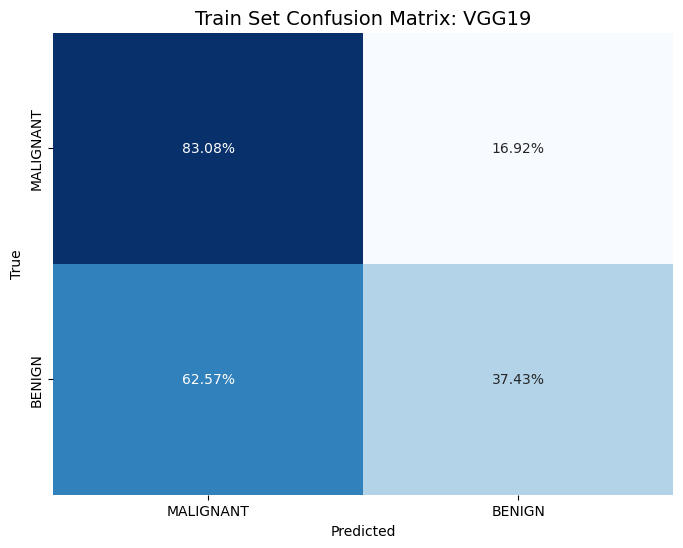

In [20]:
print(f'Train Set Classifcation report:\n {train_report_vgg}\n')
plot_confusion_matrix(train_cm_vgg, cm_labels, 'Train Set Confusion Matrix: VGG19')

Test Set Classification report:
               precision    recall  f1-score   support

   MALIGNANT       0.59      0.85      0.69       175
      BENIGN       0.70      0.38      0.49       166

    accuracy                           0.62       341
   macro avg       0.64      0.61      0.59       341
weighted avg       0.64      0.62      0.60       341




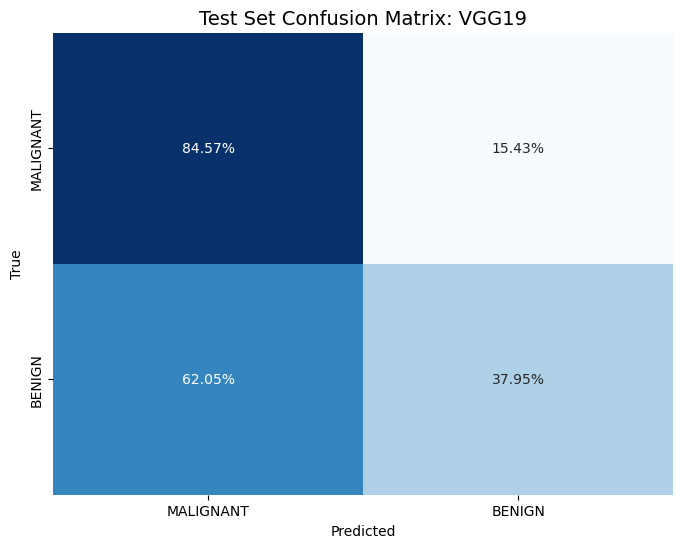

In [21]:
print(f"Test Set Classification report:\n {test_report_vgg}\n")
plot_confusion_matrix(test_cm_vgg, cm_labels, 'Test Set Confusion Matrix: VGG19')

# ROC-AUC Curves: Transfer Learning

11/11 [==============================] - 121s 11s/step


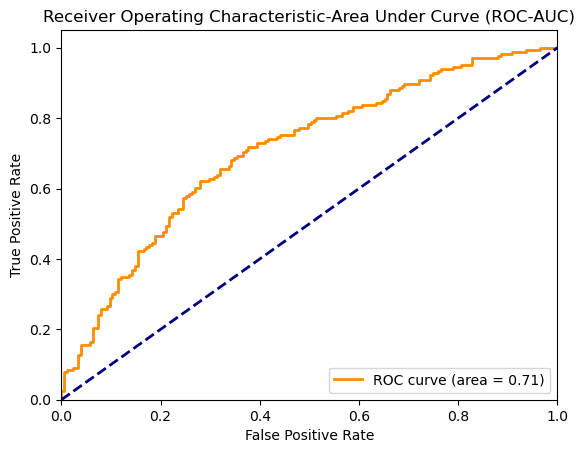

AUC: 0.71


In [22]:
# ROC-AUC Curves
from sklearn.metrics import roc_curve, auc

# Use the trained model to predict probabilities for the test set
y_pred_prob = vgg_model.predict(X_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test[:, 1], y_pred_prob[:, 1])
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-Area Under Curve (ROC-AUC)')
plt.legend(loc='lower right')
plt.show()

# Print the AUC score
print(f'AUC: {roc_auc:.2f}')

# Epochs-Loss-Accuracy Visualization: Transfer Learning

In [23]:
pre_train_dict = history_3.history

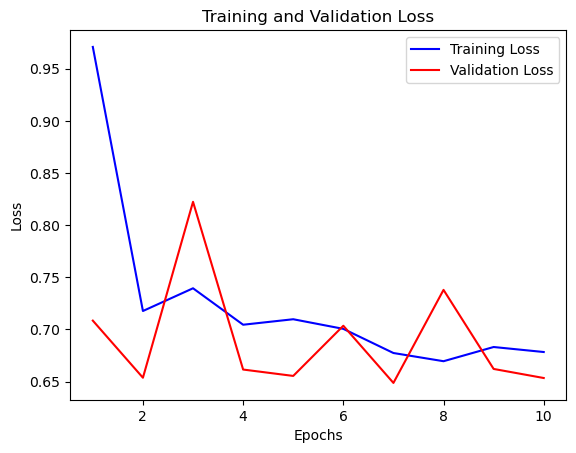

In [24]:
# plot training loss vs validation loss
loss_values = pre_train_dict['loss']
val_loss_values = pre_train_dict['val_loss']
acc = pre_train_dict['accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'b', label='Training Loss')
plt.plot(epochs, val_loss_values, 'r', label='Validation Loss')
plt.title('Training and Validation Loss', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

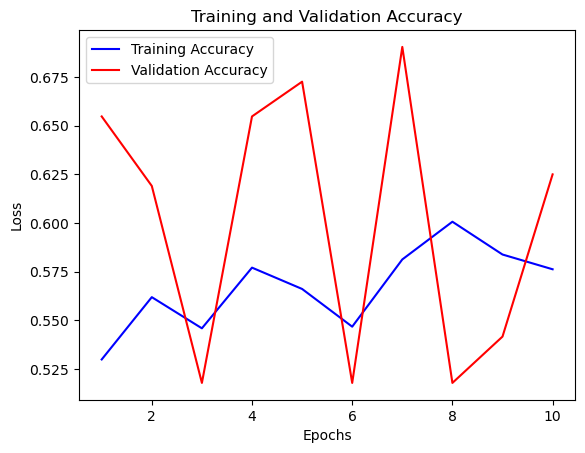

In [25]:
# plot training vs validation accuracy
val_acc_values = pre_train_dict['val_accuracy']

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy', fontsize=12)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Human Readable Predictions

In [26]:
predictions = vgg_model.predict(X_test)

11/11 [==============================] - 120s 11s/step


In [27]:
import random

# reverse class mapping
reverse_mapper = {v:k for k, v in class_mapper.items()}

# map predictions to class_names
predicted_class_indices = np.argmax(predictions, axis=1)
predicted_class_names = [reverse_mapper[i] for i in predicted_class_indices]

ground_truth_class_indices = np.argmax(y_test, axis=1)
ground_truth_class_names = [reverse_mapper[i] for i in ground_truth_class_indices]

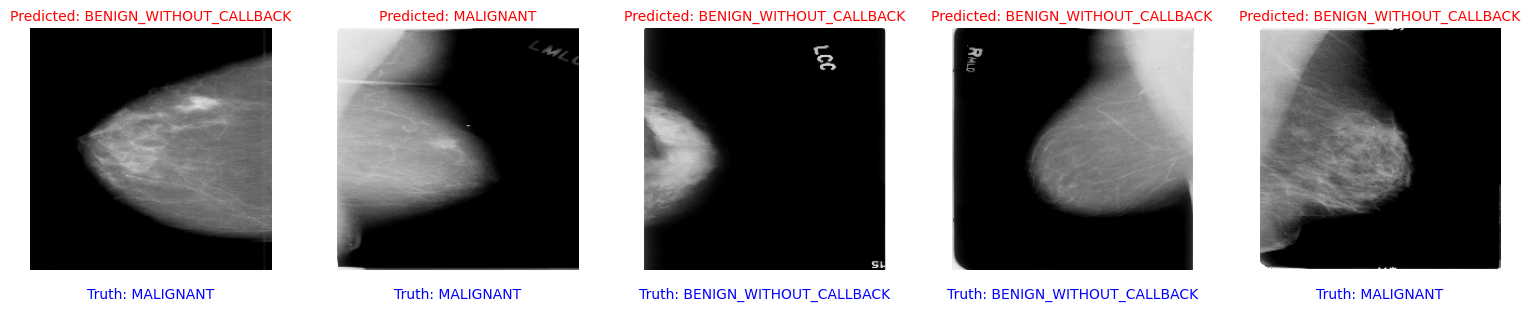

In [30]:
# display predicted class_names
num_image_visualize = min(5, len(X_test))

# create random indices to select images
random_indices = random.sample(range(len(X_test)), num_image_visualize)

# create subplots for images
fig, ax = plt.subplots(1, num_image_visualize, figsize=(15, 5))

for i, idx in enumerate(random_indices):
    ax[i].imshow(X_test[idx])
    ax[i].set_title(f'Predicted: {predicted_class_names[idx]}', fontsize=10, color='red')
    ax[i].text(0.5, -0.1, f'Truth: {ground_truth_class_names[idx]}', fontsize=10, ha='center', va='center', 
              transform=ax[i].transAxes, color='blue')
    ax[i].axis('off')

plt.tight_layout()
plt.show()

# Save Model

In [31]:
vgg_model.save('transfer_learning-1_model.h5')